# Анализ системы оценивания

Экзамен для 4 курса состоит из нескольких частей: измерение оптической плотности и навески на одном и том же веществе, решение задачи и теорического задания. Студенты выполняют все задания на бланке. В качестве данных предаставлены результаты студентов за 3 последние года.

**Цель анализа** установить следующее:

* Проверка корректности системы оценивания;
* Формирование общей системы оценивания.

Для достижения этих целей в ходе проекта будут очищены данные от избыточной и лишней информации, проведён их предварительный анализ, а также выполнены статистические тесты с использованием критериев нормальности распределения, необходимых для выбора дальнейших методов анализа.

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
sheets = pd.read_excel("./данные.xlsx", sheet_name=None)
df = pd.concat(
    df.assign(Год = int(sheet)) for sheet, df in sheets.items()
)
df = df.reset_index(drop=True)

## Описание исходных данных

In [49]:
df.head()

,Группа,"Фамилия, И.О.",A,Навеска,%,Субстанция,Задача,Карточки,Итого,Попытка,Год
0,1,gAAAAABpe2uWNTM2Q6Y-veaVUsntVHRVcESebHgPgMsEks...,0.529,90.7,98.585303,5.0,2.0,2.0,9.0,1.0,2023
1,1,gAAAAABpe2uWlIYlb8AMm8G8G774k45pDoJRmb7pCI5Yzq...,0.575,99.5,97.680653,4.0,0.0,0.0,4.0,1.0,2023
2,1,gAAAAABpe2uW-ZujaM53KMCkr9IQzTZYGBbMNmVB7dA71K...,0.650,112.9,97.315766,4.0,2.0,0.0,6.0,1.0,2023
3,1,gAAAAABpe2uWYPcLiIrVEDtc0npoOkUxZIYN1104y4CJ3K...,0.633,107.4,99.623827,3.0,2.0,2.0,7.0,1.0,2023
4,1,gAAAAABpe2uWZk1hlIlK_s4uksjoZFT38fCcLP9bMKXOm0...,0.580,100.4,97.646813,4.0,2.0,2.0,8.0,1.0,2023


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Группа         387 non-null    object 
 1   Фамилия, И.О.  387 non-null    object 
 2   A              377 non-null    float64
 3   Навеска        377 non-null    float64
 4   %              377 non-null    float64
 5   Субстанция     377 non-null    float64
 6   Задача         377 non-null    float64
 7   Карточки       377 non-null    float64
 8   Итого          377 non-null    float64
 9   Попытка        380 non-null    float64
 10  Год            387 non-null    int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 33.4+ KB


Таблица хранит данные о студентах:
* Группа;
* Фамилия, И.О.;
* A - значение получившейся оптической плотности;
* Навеска - значение получившейся навески *(далее просто H)*;
* % - массовая доля, вычисляемая дла данной субстанции по формуле $$16903 *\frac{A}{H}$$
* Субстанция - оценка за задание I-ое задание;
* Задача - оценка за задание II-ое задание;
* Карточки - оценка за задание III-ое задание;
* Итого - итоговая оценка;
* Попытка - какой раз студент стадаёт/пересдаёт экзамен;
* Год - год курса;

Возьмем только нужные для анализа данные:

In [51]:
df = df[['Группа', 'Фамилия, И.О.', 'A', 'Навеска', '%', 'Субстанция', 'Попытка', 'Год']]

## Обработка данных

Удалим из датасета данные с пустыми полями, так как они искажают результаты тестов и последующие вычисления будут не валидные.

In [52]:
df.isna().any()

Группа           False
Фамилия, И.О.    False
A                 True
Навеска           True
%                 True
Субстанция        True
Попытка           True
Год              False
dtype: bool

In [53]:
df[(df['A'].isna() == True)]

,Группа,"Фамилия, И.О.",A,Навеска,%,Субстанция,Попытка,Год
9,1,gAAAAABpe2uWf7aR9jtuHVfYf05vd_PoVzBNsKEsQbzDIQ...,NaN,NaN,NaN,NaN,1.0,2023
54,5,gAAAAABpe2uW_8r8GqyQEq1ANEgGZ13nWJ5Cu-eY20NWf5...,NaN,NaN,NaN,0.0,1.0,2023
62,6,gAAAAABpe2uWH-j8NcbuejJS29MBhIadWFXb0IJ2AkbZe9...,NaN,NaN,NaN,NaN,1.0,2023
114,11,gAAAAABpe2uWoxfU-C0xz9fMQgiBI_AuDbPmMP-lgYYKJe...,NaN,NaN,NaN,NaN,1.0,2023
147,1,gAAAAABpe2uWwkkhpNy-bHTFJ_s6pH3EpqklYFw7SdbT5T...,NaN,NaN,NaN,5.0,1.0,2024
182,5,gAAAAABpe2uWk5NPvy8sofNrVduWarDDtXsDSpmdFmHvKK...,NaN,NaN,NaN,5.0,1.0,2024
186,5,gAAAAABpe2uWP-P-jxah0H8hzJvIbO1izHrLxp_rLUSevq...,NaN,NaN,NaN,5.0,1.0,2024
237,10,gAAAAABpe2uWkZVbqlHtND8SRZUHPwpF4ga2ZU7QL7HXuo...,NaN,NaN,NaN,5.0,1.0,2024
238,10,gAAAAABpe2uW6NLDvPCcoLZN6mE03afoawM5vIeOmgFmtD...,NaN,NaN,NaN,5.0,1.0,2024
241,10,gAAAAABpe2uWmZkekpH6e3ZzDfkyzO3jePqeZJyT9Og62v...,NaN,NaN,NaN,0.0,1.0,2024


Из анализа были исключенны студенты с отсутсвующими эксперементальными измерениями:
* студенты, получившиеся автоматы;
* студенты, не пришедшие на экзамен.

In [54]:
df = df.drop(df[df['A'].isna() == True].index)

In [55]:
df[(df['Навеска'].isna() == True)]

,Группа,"Фамилия, И.О.",A,Навеска,%,Субстанция,Попытка,Год


In [56]:
df[(df['%'].isna() == True)]

,Группа,"Фамилия, И.О.",A,Навеска,%,Субстанция,Попытка,Год


In [57]:
df[(df['Субстанция'].isna() == True)]

,Группа,"Фамилия, И.О.",A,Навеска,%,Субстанция,Попытка,Год
123,П,gAAAAABpe2uWE3P_I0PNUfBmPNGUknVzLA8i8JhAcvh0YM...,0.613,104.4,99.248458,NaN,NaN,2023
124,П,gAAAAABpe2uWGOJQmXJ0BC-PU0QM5mD9wOjLadHZdESgab...,0.621,107.0,98.100589,NaN,NaN,2023
125,П,gAAAAABpe2uWxTHaJkCwOWbPhogRnUK4YUAPzWItS1R6Ed...,0.624,108.5,97.211724,NaN,NaN,2023
126,П,gAAAAABpe2uWuYUiJStquKAxWUQuUd46BgA-jLBmmFd_FR...,0.675,116.3,98.104256,NaN,NaN,2023
127,П,gAAAAABpe2uWh08xwBfRenrMLafE0EE0xapozM3vRHZqkw...,0.720,125.2,97.205751,NaN,NaN,2023
385,П,gAAAAABpe2uWwtnct4iogKY12gAUDkrfKaWPrIa8XfNKYh...,0.557,98.6,95.486521,NaN,NaN,2025
386,П,gAAAAABpe2uW8_Qx2C0wZ_yMX_0TkWuWRRf2nF7kz_WS99...,0.580,102.5,95.646244,NaN,NaN,2025


Результаты педагогов не включались в основной анализ, так как они представляют иную генеральную совокупность с существенно отличающимся уровнем подготовки и опытом.

Вместо этого они использовались в качестве референсной группы для последующих измерений, а их значения использовались в качестве *эталонных*.

In [58]:
teachers = df[df['Группа'] == 'П']
df = df.drop(teachers.index)

In [59]:
df.shape

(370, 8)

In [60]:
df[(df['Попытка'].isna() == True)]

,Группа,"Фамилия, И.О.",A,Навеска,%,Субстанция,Попытка,Год


Также возможны ошибки в заполнении бланков студентами (например, слишком большая оптическая плотность или слишком маленькая навеска). Их следует удалить, так как они приводят к искажению результатов измерений и выходу данных за пределы применимости метода оценки.

In [61]:
df[df['A'] > df['A'].quantile(0.99)]

,Группа,"Фамилия, И.О.",A,Навеска,%,Субстанция,Попытка,Год
160,2,gAAAAABpe2uWN_QzHbhd68W2rz4-GF9SXt9M1zB0vvafiP...,554.000,90.0,104047.355556,0.0,1.0,2024
257,2,gAAAAABpe2uWPaETdLZl6latvzy6sVcUh-WXH87c6WzVBi...,553.000,94.8,98600.833333,0.0,2.0,2024
300,4,gAAAAABpe2uWlbfOvtke3Fyp-tGj-QiutOqrkYsUk7QVBN...,0.834,142.1,99.205503,5.0,1.0,2025
365,10,gAAAAABpe2uWoeBB2eX7gHC9LsdJL6JDRbC3vYFZWu6kop...,0.809,134.8,101.443079,3.0,1.0,2025


In [62]:
df[df['Навеска'] < df['Навеска'].quantile(0.01)]

,Группа,"Фамилия, И.О.",A,Навеска,%,Субстанция,Попытка,Год
56,6,gAAAAABpe2uWe0uhe1c4IS8xl9OToLPiGdKrhlg27sJQBR...,0.186,31.1,101.091897,1.0,1.0,2023
79,8,gAAAAABpe2uWwusGXbhTHlBcFyRfjfvQfUvINAfAKPYo41...,0.430,73.7,98.619946,5.0,1.0,2023
137,11,gAAAAABpe2uWbFj7PnK9Fi6VbnOaITmVHD2bev3Hooq4id...,0.452,76.9,99.351834,4.0,2.0,2023
287,3,gAAAAABpe2uW5opjPH6seJsT_6J0J3p8Q9Kkh5LSS6bcHk...,0.452,77.6,98.455619,5.0,1.0,2025


In [63]:
df = df.drop([160, 257, 56]) 

В анализе учитывались только первые попытки студентов, поскольку именно они отражают исходный уровень подготовки. Повторные попытки, как правило, сопровождаются дополнительной подготовкой или коррекцией ошибок и потому не сравнимы с первичными результатами.

In [64]:
df[df['Попытка'] > 1]

,Группа,"Фамилия, И.О.",A,Навеска,%,Субстанция,Попытка,Год
128,1,gAAAAABpe2uWBX-pgjBnETwcHFkbj3GFWveBgByP8FFsoU...,0.554,96.2,97.341601,4.0,2.0,2023
129,5,gAAAAABpe2uWKDo4aBCDyg-cUBemdkMzVWNXu8oyUaDEr5...,0.617,105.3,99.042270,5.0,2.0,2023
130,6,gAAAAABpe2uWjX2vaZrl9CRZQgr2Hh3a7nOq8v0tF3SM1c...,0.613,103.1,100.499893,2.0,2.0,2023
131,6,gAAAAABpe2uWJRnFR0mEFFLcUufT3W1JDm5PCUb439d_Fq...,0.614,102.1,101.649775,1.0,2.0,2023
132,7,gAAAAABpe2uWqR-MWbdef8ca-qpKcdK4UDRBwzsWhmcC6e...,0.587,100.7,98.530894,5.0,2.0,2023
133,7,gAAAAABpe2uWmCWAW2Ot8fGAUosOnrCifNq7KZh3LAeT8i...,0.615,103.3,100.632575,2.0,2.0,2023
134,8,gAAAAABpe2uWKZuYuvZctZP4FrzpwolYAmiTCJ5mgMETOQ...,0.565,93.6,102.031998,0.0,2.0,2023
135,9,gAAAAABpe2uWL1MNJZuohE7wUUVENNjAI4NEnwr2dnX7Tn...,0.657,112.5,98.713520,5.0,2.0,2023
136,10,gAAAAABpe2uWlzLGuBm5GuN3mv_fl59fYDxDSkJtZgeRyT...,0.582,100.2,98.179102,5.0,2.0,2023
137,11,gAAAAABpe2uWbFj7PnK9Fi6VbnOaITmVHD2bev3Hooq4id...,0.452,76.9,99.351834,4.0,2.0,2023


In [65]:
df = df.drop(df[df['Попытка'] > 1].index)
df = df.reset_index(drop=True)

In [66]:
df.shape

(331, 8)

In [67]:
df.groupby('Субстанция')['%'].describe()

,count,mean,std,min,25%,50%,75%,max
Субстанция,,,,,,,,
0.0,19.0,94.513851,21.223354,24.490142,88.962086,92.309086,107.049937,126.817028
1.0,12.0,101.974735,2.645975,94.954554,101.049267,102.262113,103.781114,104.802053
2.0,26.0,99.462707,3.174952,95.674094,96.222034,100.267996,102.467464,103.508264
3.0,67.0,98.594381,2.025745,96.154790,97.019699,97.314990,99.939715,102.466874
4.0,79.0,98.790336,1.365131,97.263073,97.675391,98.026370,100.297308,101.418000
5.0,128.0,98.949046,0.666355,97.754474,98.470754,98.938142,99.504563,100.426528


## Проверка корректности оценивая

Проверим правильно ли высчитывалась формула молярной доли. Зная навеску, оптическую плотность и получившеся результаты молярной доли, посчитаем коэффициент. У всех студентов он должен быть равен 16903.

In [68]:
(df['%'] * df['Навеска'] / df['A']).value_counts()

16903.0    266
16903.0     21
16903.0     17
16903.0     13
16903.0     12
16903.0      1
16903.0      1
Name: count, dtype: int64

Разобьём данные по годам:

In [69]:
df_2023 = df[df['Год'] == 2023]
df_2024 = df[df['Год'] == 2024]
df_2025 = df[df['Год'] == 2025]

Известно, что для вычисление оценки за I-ое задание использовался следующий алгоритм. Сначала из таблицы удалялись все данные до того момента, пока они не будут входить в интервал +-3σ. Дальше оценки ставились по следующей формуле:
$$Оценка = \begin{cases}
   5, если \pm0.5\sigma
   \\
   4, если \pm1\sigma
   \\
   3, если \pm1.5\sigma
   \\
   2, если \pm2\sigma
   \\
   1, иначе
 \end{cases}$$
 Правило 3σ используется только в случае нормального распределения. Поэтому прежде, чем проверять правильность самих вычислений, исследуем распределение массовой доли при помощи критерия Шапиро-Уилка для каждого года по отдельности и в общем.

In [70]:
from scipy.stats import shapiro

stat, p = shapiro(df['%'])
stat_2023, p_2023 = shapiro(df_2023['%'])
stat_2024, p_2024 = shapiro(df_2024['%'])
stat_2025, p_2025 = shapiro(df_2025['%']) 


p, p_2023, p_2024, p_2025


(np.float64(4.914560105435927e-31),
 np.float64(1.6761562046202668e-18),
 np.float64(3.92856173230186e-19),
 np.float64(2.6569093349948443e-09))

Все получившиеся p-value значительно меньше 0.05, соответственно нормального распределения здесь нет и использовать правило 3σ нельзя. Лучше использовать правило 1.5IQR.

In [71]:
def filter_3sigma(df, column):
    df_filtered = df.copy()
    intervals = []

    while True:
        mu = df_filtered[column].mean()
        sigma = df_filtered[column].std(ddof=1)
        
        #текущий интервал
        interval = (mu - 3*sigma, mu + 3*sigma)
        intervals.append(interval)
        
        filtered = df_filtered[(df_filtered[column] > interval[0]) & (df_filtered[column] < interval[1])]
        
        if len(filtered) == len(df_filtered):
            break
        df_filtered = filtered

    return df_filtered, intervals

def filter_IQR(df, column):
    df_filtered = df.copy()
    intervals = []

    while True:
        Q1 = df_filtered[column].quantile(0.25)
        Q3 = df_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        
        #текущий интервал
        interval = (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
        intervals.append(interval)
        
        filtered = df_filtered[(df_filtered[column] > interval[0]) & (df_filtered[column] < interval[1])]
        
        if len(filtered) == len(df_filtered):
            break
        df_filtered = filtered

    return df_filtered, intervals

In [72]:
df_2023_s, intervals_3s = filter_3sigma(df_2023, '%')
    
df_2023_s.describe()

,A,Навеска,%,Субстанция,Попытка,Год
count,112.000000,112.000000,112.000000,112.000000,112.0,112.0
mean,0.582687,100.060714,98.430312,3.946429,1.0,2023.0
std,0.041966,7.098069,1.116326,1.129771,0.0,0.0
min,0.430000,73.700000,96.197419,1.000000,1.0,2023.0
25%,0.563000,97.075000,97.672815,3.000000,1.0,2023.0
50%,0.576000,98.800000,98.251246,4.000000,1.0,2023.0
75%,0.595500,102.625000,99.124132,5.000000,1.0,2023.0
max,0.720000,124.400000,101.665533,5.000000,1.0,2023.0


In [73]:
df_2023_IQR, intervals_1_5IQR = filter_IQR(df_2023, '%')
    
df_2023_IQR.describe()

,A,Навеска,%,Субстанция,Попытка,Год
count,110.000000,110.000000,110.000000,110.00000,110.0,110.0
mean,0.582745,100.126364,98.373424,4.00000,1.0,2023.0
std,0.042342,7.144943,1.042089,1.06659,0.0,0.0
min,0.430000,73.700000,96.197419,1.00000,1.0,2023.0
25%,0.563000,97.100000,97.665457,3.00000,1.0,2023.0
50%,0.576000,98.900000,98.218822,4.00000,1.0,2023.0
75%,0.598500,102.675000,99.092573,5.00000,1.0,2023.0
max,0.720000,124.400000,101.122033,5.00000,1.0,2023.0


Применение IQR привело к более строгой фильтрации: количество студентов с оценками от 1 до 5 сократилось с 110 до 108, а число студентов с нулевой оценкой, соответственно, увеличилось.

In [74]:
df_2023_s[~df_2023_s['Фамилия, И.О.'].isin(df_2023_IQR['Фамилия, И.О.'])]


,Группа,"Фамилия, И.О.",A,Навеска,%,Субстанция,Попытка,Год
76,8,gAAAAABpe2uWproYmcchhUwYyZp8CKllxVejsygTLUKWht...,0.584,97.3,101.452744,1.0,1.0,2023
97,10,gAAAAABpe2uW5nIn2Uqman-IdzIlmjWBgvCtgZUaYrIfOT...,0.575,95.6,101.665533,1.0,1.0,2023


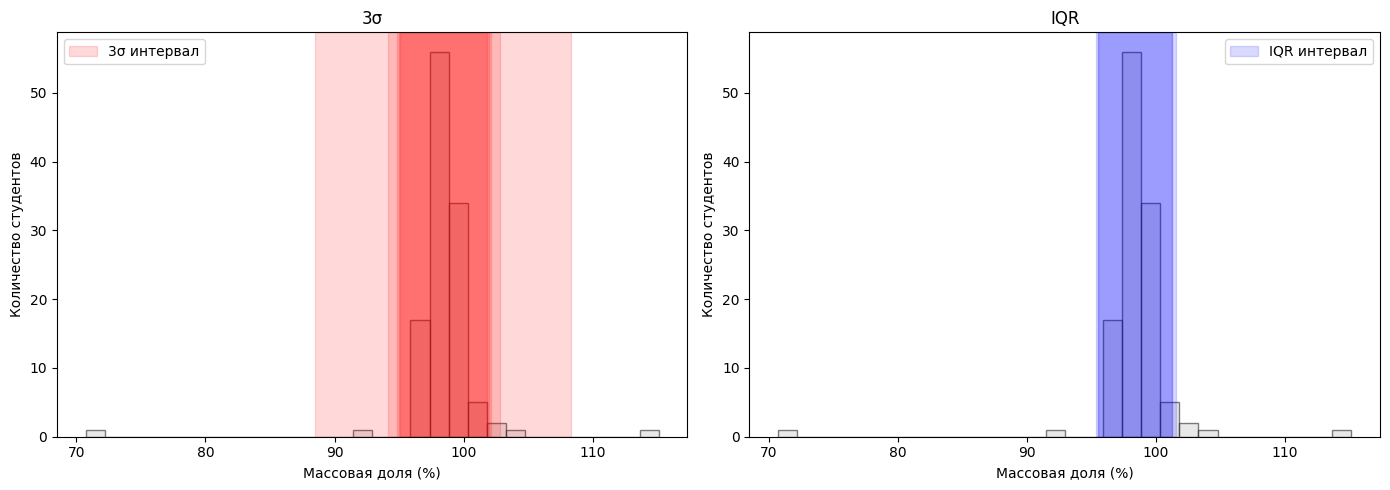

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].hist(df_2023['%'], bins=30, color='lightgrey', edgecolor='black', alpha=0.5)
for i, (low, high) in enumerate(intervals_3s):
    axes[0].axvspan(low, high, color='red', alpha=0.15, label='3σ интервал' if i==0 else "")
axes[0].set_xlabel('Массовая доля (%)')
axes[0].set_ylabel('Количество студентов')
axes[0].set_title('3σ')
axes[0].legend()

axes[1].hist(df_2023['%'], bins=30, color='lightgrey', edgecolor='black', alpha=0.5)
for i, (low, high) in enumerate(intervals_1_5IQR):
    axes[1].axvspan(low, high, color='blue', alpha=0.15, label='IQR интервал' if i==0 else "")
axes[1].set_xlabel('Массовая доля (%)')
axes[1].set_ylabel('Количество студентов')
axes[1].set_title('IQR')
axes[1].legend()

plt.tight_layout()
plt.show()

Анализ результатов показывает, что второй метод демонстрирует заметно меньшую чувствительность к выбросам, что делает его более стабильным и надёжным в данной задаче.

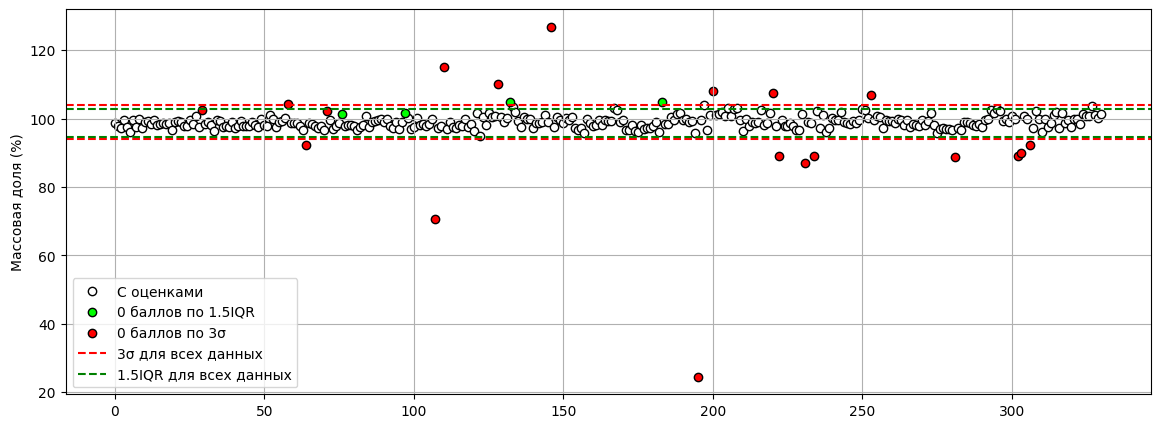

In [76]:
plt.figure(figsize=(14, 5))
df_2024_s, intervals_3s = filter_3sigma(df_2024, '%')
df_2025_s, intervals_3s = filter_3sigma(df_2025, '%')

df_2024_IQR, intervals_1_5IQR = filter_IQR(df_2024, '%')
df_2025_IQR, intervals_1_5IQR = filter_IQR(df_2025, '%')

df_IQR = pd.concat([
    df_2023_IQR,
    df_2024_IQR,
    df_2025_IQR
])

plt.scatter(df_IQR['%'].index, df_IQR['%'].values, edgecolor='black', facecolor='white', marker='o', label='С оценками')

df_temp_1 = pd.concat([
    df_2023_s[(~df_2023_s['Фамилия, И.О.'].isin(df_2023_IQR['Фамилия, И.О.']))],
    df_2024_s[(~df_2024_s['Фамилия, И.О.'].isin(df_2024_IQR['Фамилия, И.О.']))],
    df_2025_s[(~df_2025_s['Фамилия, И.О.'].isin(df_2025_IQR['Фамилия, И.О.']))],
    ])
plt.scatter(df_temp_1['%'].index, df_temp_1['%'].values, edgecolor='black', facecolor='lime', marker='o', label='0 баллов по 1.5IQR')

df_temp_2 = pd.concat([
    df_2023[(~df_2023['Фамилия, И.О.'].isin(df_2023_s['Фамилия, И.О.']))],
    df_2024[(~df_2024['Фамилия, И.О.'].isin(df_2024_s['Фамилия, И.О.']))],
    df_2025[(~df_2025['Фамилия, И.О.'].isin(df_2025_s['Фамилия, И.О.']))]
    ])
plt.scatter(df_temp_2['%'].index, df_temp_2['%'].values, edgecolor='black', facecolor='red', marker='o', label='0 баллов по 3σ')

df_s, intervals_3s = filter_3sigma(df, '%')
df_IQR, intervals_1_5IQR = filter_IQR(df, '%')

plt.axhline(y=intervals_3s[-1][0], color='red', linestyle='--', label='3σ для всех данных') 
plt.axhline(y=intervals_3s[-1][1], color='red', linestyle='--')

plt.axhline(y=intervals_1_5IQR[-1][0], color='green', linestyle='--', label='1.5IQR для всех данных') 
plt.axhline(y=intervals_1_5IQR[-1][1], color='green', linestyle='--') 
plt.ylabel('Массовая доля (%)')
plt.legend(loc=3)
plt.grid(True)
plt.show()


Несмотря на робастность метода 1.5 IQR, использование его в качестве критерия оценивания остаётся проблематичным.

Границы, определяемые методом IQR, зависят от распределения данных в конкретном году. В результате один и тот же по физическому смыслу результат может получать различную оценку в зависимости от состава группы.

Таким образом, метод 1.5 IQR не устраняет зависимость оценивания от крайних значений выборки и не обеспечивает воспроизводимости критериев между различными годами.

## Формирование системы оценивания

In [77]:
df.head()

,Группа,"Фамилия, И.О.",A,Навеска,%,Субстанция,Попытка,Год
0,1,gAAAAABpe2uWNTM2Q6Y-veaVUsntVHRVcESebHgPgMsEks...,0.529,90.7,98.585303,5.0,1.0,2023
1,1,gAAAAABpe2uWlIYlb8AMm8G8G774k45pDoJRmb7pCI5Yzq...,0.575,99.5,97.680653,4.0,1.0,2023
2,1,gAAAAABpe2uW-ZujaM53KMCkr9IQzTZYGBbMNmVB7dA71K...,0.650,112.9,97.315766,4.0,1.0,2023
3,1,gAAAAABpe2uWYPcLiIrVEDtc0npoOkUxZIYN1104y4CJ3K...,0.633,107.4,99.623827,3.0,1.0,2023
4,1,gAAAAABpe2uWZk1hlIlK_s4uksjoZFT38fCcLP9bMKXOm0...,0.580,100.4,97.646813,4.0,1.0,2023


Для формирования общей системы оценивания будем использовать эталонную значения. В качестве него используется среднее значение
результатов преподавателей.

Для каждого студента рассчитаем отклонение от данного эталона.

In [78]:
teachers

,Группа,"Фамилия, И.О.",A,Навеска,%,Субстанция,Попытка,Год
123,П,gAAAAABpe2uWE3P_I0PNUfBmPNGUknVzLA8i8JhAcvh0YM...,0.613,104.4,99.248458,NaN,NaN,2023
124,П,gAAAAABpe2uWGOJQmXJ0BC-PU0QM5mD9wOjLadHZdESgab...,0.621,107.0,98.100589,NaN,NaN,2023
125,П,gAAAAABpe2uWxTHaJkCwOWbPhogRnUK4YUAPzWItS1R6Ed...,0.624,108.5,97.211724,NaN,NaN,2023
126,П,gAAAAABpe2uWuYUiJStquKAxWUQuUd46BgA-jLBmmFd_FR...,0.675,116.3,98.104256,NaN,NaN,2023
127,П,gAAAAABpe2uWh08xwBfRenrMLafE0EE0xapozM3vRHZqkw...,0.720,125.2,97.205751,NaN,NaN,2023
385,П,gAAAAABpe2uWwtnct4iogKY12gAUDkrfKaWPrIa8XfNKYh...,0.557,98.6,95.486521,NaN,NaN,2025
386,П,gAAAAABpe2uW8_Qx2C0wZ_yMX_0TkWuWRRf2nF7kz_WS99...,0.580,102.5,95.646244,NaN,NaN,2025


In [79]:
t_mean = teachers['%'].mean()
df['abs_error'] = (df['%'] - t_mean).abs()
df['rel_error'] = df['abs_error'] / t_mean * 100

df[['%', 'abs_error', 'rel_error']].describe()

,%,abs_error,rel_error
count,331.000000,331.000000,331.000000
mean,98.734829,2.589760,2.662001
std,5.335717,4.883393,5.019614
min,24.490142,0.001635,0.001680
25%,97.691195,0.720215,0.740305
50%,98.836579,1.692171,1.739374
75%,99.916035,2.982534,3.065731
max,126.817028,72.796078,74.826710


In [80]:
t_mean

np.float64(97.2862203392815)

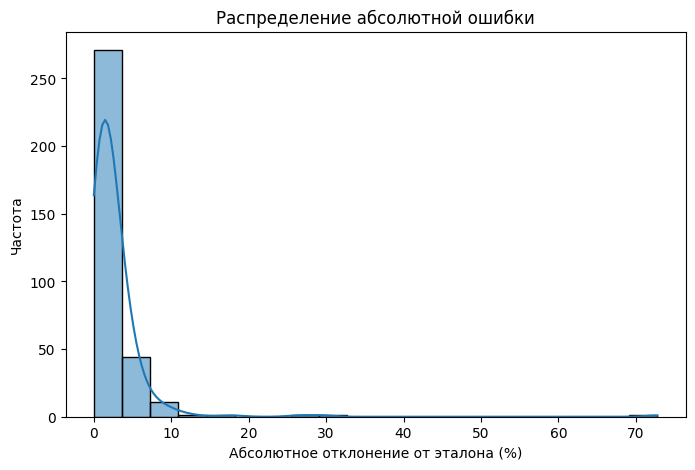

In [81]:
plt.figure(figsize=(8, 5))
sns.histplot(df['abs_error'], bins=20, kde=True)
plt.xlabel('Абсолютное отклонение от эталона (%)')
plt.ylabel('Частота')
plt.title('Распределение абсолютной ошибки')
plt.show()

Распределение ошибки является асимметричным и сосредоточено в области малых значений, с длинным хвостом отклонений. Это подтверждает, что большинство студентов получают оценки близкие к эталонному, а основные различия проявляются в величине ошибки.

In [82]:
df.groupby('Субстанция')['rel_error'].quantile(0.95)

Субстанция
0.0    34.801779
1.0     7.693604
2.0     6.024509
3.0     4.657091
4.0     3.797098
5.0     2.727081
Name: rel_error, dtype: float64

Для формирования границ оценивания использовалась величина rel_error (процентной погрешности), соответствующая 95-му перцентилю для более высокой оценки.

Такой подход позволяет избежать влияния единичных аномальных значений,сохраняя при этом критериальный характер системы оценивания, в которой результат студента сравнивается с эталоном, а не с другими студентами.

Полученная новая система имеет вид:
$$Оценка = \begin{cases}
   5, если \ \delta\leq 2.73
   \\
   4, если \ \delta\leq 3.80
   \\
   3, если  \ \delta\leq 4.66
   \\
   2, если \ \delta\leq 6.02
   \\
   1, если \ \delta\leq 7.69
   \\
   0, иначе
 \end{cases}$$

In [83]:
def grade_from_error(err):
    if err <= 2.73:
        return 5
    elif err <= 3.80:
        return 4
    elif err <= 4.66:
        return 3
    elif err <= 6.02:
        return 2
    elif err <= 7.69:
        return 1
    else:
        return 0

df['Оценка_по_шкале'] = df['rel_error'].apply(grade_from_error)


In [84]:
pd.crosstab(df['Субстанция'], df['Оценка_по_шкале'])

Оценка_по_шкале,0,1,2,3,4,5
Субстанция,,,,,,
0.0,13,2,4,0,0,0
1.0,1,3,2,3,2,1
2.0,0,2,10,0,2,12
3.0,0,0,4,11,2,50
4.0,0,0,0,4,19,56
5.0,0,0,0,0,7,121


Высокая доля оценки «5» в рамках формализованной шкалы обусловлена изменением принципа оценивания.Ранее учитывалось правило 3σ, рассчитываемое отдельно для сравнительно малых групп студентов.

При таком подходе границы оценивания определялись не относительно эталонного значения, а относительно среднего результата группы. В результате даже значения, находящиеся вблизи эталона и соответствующие малой относительной ошибке, могли выходить за пределы допустимого диапазона (превышать 0.5 отклонения) и получать более низкую оценку.

Предложенная система оценивания устраняет эту проблему, так как сравнение производится непосредственно с эталонным значением, а критерии оценивания не зависят от состава и размера выборки.


In [85]:
df['delta_grade'] = df['Оценка_по_шкале'] - df['Субстанция']

df_mismatch = df[np.abs(df['delta_grade']) > 1]
df_match = df[np.abs(df['delta_grade']) <= 1]

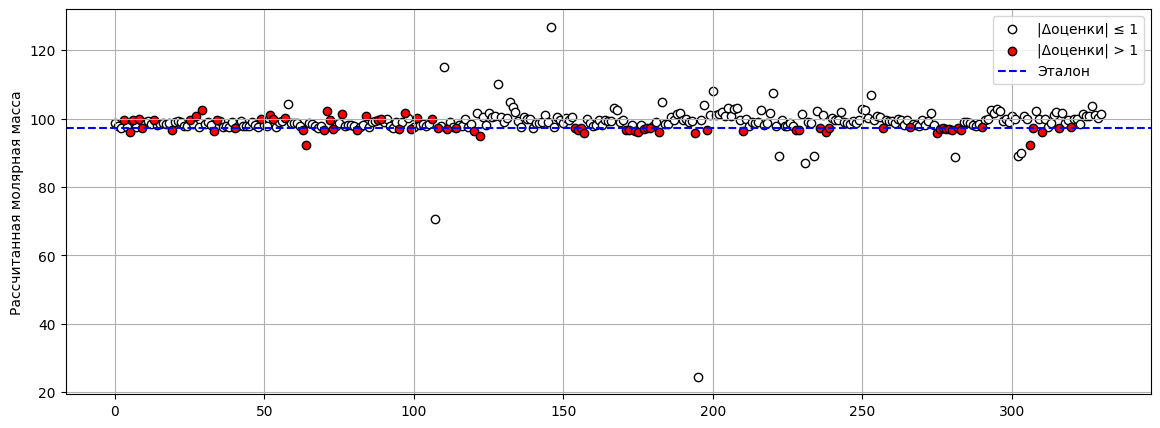

In [86]:
plt.figure(figsize=(14, 5))

plt.scatter(
    df_match.index,
    df_match['%'],
    facecolor='white',
    edgecolor='black',
    label='|Δоценки| ≤ 1'
)

plt.scatter(
    df_mismatch.index,
    df_mismatch['%'],
    facecolor='red',
    edgecolor='black',
    label='|Δоценки| > 1'
)

plt.axhline(y=t_mean, linestyle='--', color='blue', label='Эталон')

plt.ylabel('Рассчитанная молярная масса')
plt.legend()
plt.grid(True)
plt.show()


## Результаты

В ходе работы было показано, что применение статистических критериев, таких как правило 3σ или 1.5 IQR, для оценивания экзаменационных работ приводит к выборочно-зависимым и невоспроизводимым результатам, особенно при работе с малыми группами студентов.
Анализ фактических данных продемонстрировал, что выставляемая оценка на практике связана с величиной ошибки результата относительно эталонного значения, однако отсутствие формализованных границ приводило к неоднородности оценивания.

Предложенная система оценивания, основанная на относительной ошибке
относительно эталонного значения, устраняет зависимость от распределения,
обеспечивает интерпретируемость критериев и воспроизводимость между
различными годами и группами.

Таким образом, переход к критериальной системе оценивания позволяет
повысить объективность и прозрачность экзаменационной процедуры
без искажения реального уровня подготовки студентов.
